# Kmeans experiments

This notebook calculates the speedup between the sequential and parallel implementation.

In [1]:
import pandas as pd

## Loading datasets

This section loads the datasets execution results used for the experiments.

In [13]:
datasets = ['rice', 'htru2', 'wesad']

### Sequential

Loading the sequential dataframes.

In [14]:
dfs_sequential: list[pd.DataFrame] = []
for dataset in datasets:
    dfs_sequential.append(pd.read_csv(f'../kmeans-sequential/experiments/{dataset}_experiment_result.csv'))
df_sequential = pd.concat(dfs_sequential, join='inner')

In [15]:
df_sequential.head()

,iteration,dataset,time,converged_at
0,0,rice,0.001055,10
1,1,rice,0.001022,10
2,2,rice,0.001024,10
3,3,rice,0.001118,11
4,4,rice,0.000845,8


### Parallel

Loading the parallel dataframes.

In [16]:
dfs_omp: list[pd.DataFrame] = []
for dataset in datasets:
    dfs_omp.append(pd.read_csv(f'../kmeans-openmp/experiments/{dataset}_experiment_result.csv'))
df_omp = pd.concat(dfs_omp, join='inner')

In [17]:
df_omp.head()

,iteration,dataset,time,converged_at
0,0,rice,0.043580,2
1,1,rice,0.150733,8
2,2,rice,0.062929,9
3,3,rice,0.000565,8
4,4,rice,0.003392,8


## Comparing execution time

This section compares the execution time between the parallel and 

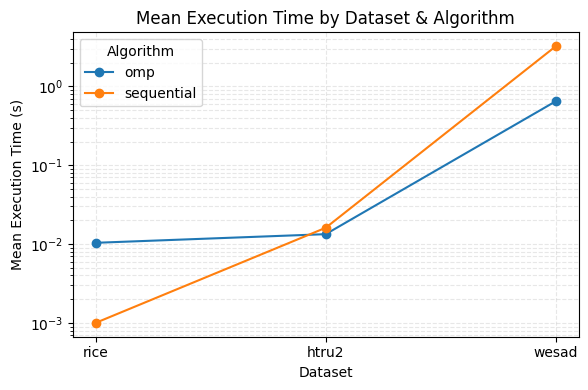

In [24]:
df_omp['algorithm'] = 'omp'
df_sequential['algorithm'] = 'sequential'
df = pd.concat([df_omp, df_sequential])

mean_times = (
    df
    .groupby(['dataset','algorithm'])['time']
    .mean()
    .unstack('algorithm')
    .loc[datasets]
)

fig, ax = plt.subplots(figsize=(6,4))
for alg in mean_times.columns:
    ax.plot(
        mean_times.index,
        mean_times[alg],
        marker='o',
        label=alg
    )

ax.set_xlabel('Dataset')
ax.set_ylabel('Mean Execution Time (s)')
ax.set_yscale('log')
ax.set_title('Mean Execution Time by Dataset & Algorithm')
ax.grid(True, which='both', ls='--', alpha=0.3)
ax.legend(title='Algorithm')

plt.tight_layout()
plt.show()

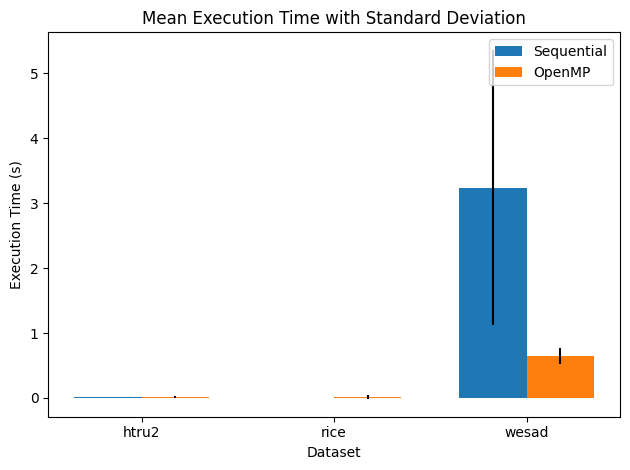

In [22]:
# Plot bar chart with error bars
unique_datasets = stats['dataset'].unique()
x = np.arange(len(unique_datasets))
width = 0.35

seq_stats = stats[stats['algorithm'] == 'sequential']
omp_stats = stats[stats['algorithm'] == 'openmp']

fig, ax = plt.subplots()
ax.bar(x - width/2, seq_stats['mean'], width, yerr=seq_stats['std'], label='Sequential')
ax.bar(x + width/2, omp_stats['mean'], width, yerr=omp_stats['std'], label='OpenMP')
ax.set_xticks(x)
ax.set_xticklabels(unique_datasets)
ax.set_xlabel('Dataset')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Mean Execution Time with Standard Deviation')
ax.legend()

plt.tight_layout()
plt.show()